# EDSA Apple Price Challenge

## Problem background
Imagine you are in the Fresh Produce Industry. How much stock do you have on hand? Not too little that you run out of stock when customers want to buy more. And not too much that food waste occurs. How do you set your prices? Yields from farms fluctuate by season. Should your prices then also fluctuate by season?

With this context, EDSA is challenging you to construct a regression algorithm, capable of accurately predicting how much a kilogram of Golden Delicious Apples will cost, given certain parameters.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being able to accurately determine how much stock to have on hand and what price to set the Golden Delicious Apples to.

## Importing Libraries

In [276]:
# Arrays
import numpy as np
import pandas as pd

# Regression models
from sklearn.linear_model import LinearRegression

# Model slection
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Other
from scipy import stats
import math
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error

## Importing Data

In [277]:
train = pd.read_csv('https://raw.githubusercontent.com/onkarabiletshele/Regression_AM6_DSFT/main/Data/df-train_set.csv')
test = pd.read_csv('https://raw.githubusercontent.com/onkarabiletshele/Regression_AM6_DSFT/main/Data/df-test_set.csv')
sample_submission = pd.read_csv('https://raw.githubusercontent.com/onkarabiletshele/Regression_AM6_DSFT/main/Data/sample_submission.csv')
index = test['Index']
test = test.drop('Index', axis=1)

# Data Preprocessing

## Data Cleaning and Formatting

# Taking a look at our data #

In [278]:
train = train[train['Commodities'].str.contains('APPLE GOLDEN DELICIOUS')]

In [279]:
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [280]:
test.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [281]:
test.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,34.142482,164.202891,195.590073,18788.111212,174.883212,2725.402336,439.245255
std,87.575995,355.167319,389.109476,33951.586813,299.351142,5059.123311,715.985761
min,3.000000,10.000000,10.000000,10.000000,1.000000,6.300000,0.000000
25%,9.000000,50.000000,64.000000,1300.000000,13.000000,204.000000,20.000000
50%,12.000000,80.000000,112.000000,5520.000000,62.000000,860.100000,153.000000
75%,18.300000,128.000000,160.000000,21176.000000,200.000000,3033.000000,516.000000
max,400.000000,2400.000000,2400.000000,308010.000000,2774.000000,47200.000000,6827.000000


In [282]:
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


In [283]:
test.skew()

Weight_Kg         3.941111
Low_Price         4.585123
High_Price        4.326922
Sales_Total       3.839600
Total_Qty_Sold    3.710551
Total_Kg_Sold     4.270965
Stock_On_Hand     3.197405
dtype: float64

In [284]:
test.kurtosis()

Weight_Kg         13.611804
Low_Price         20.126362
High_Price        17.610473
Sales_Total       19.626133
Total_Qty_Sold    19.531658
Total_Kg_Sold     24.423404
Stock_On_Hand     14.868371
dtype: float64

In [285]:
train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

## Checking the distribution ##

<AxesSubplot:xlabel='avg_price_per_kg', ylabel='Density'>

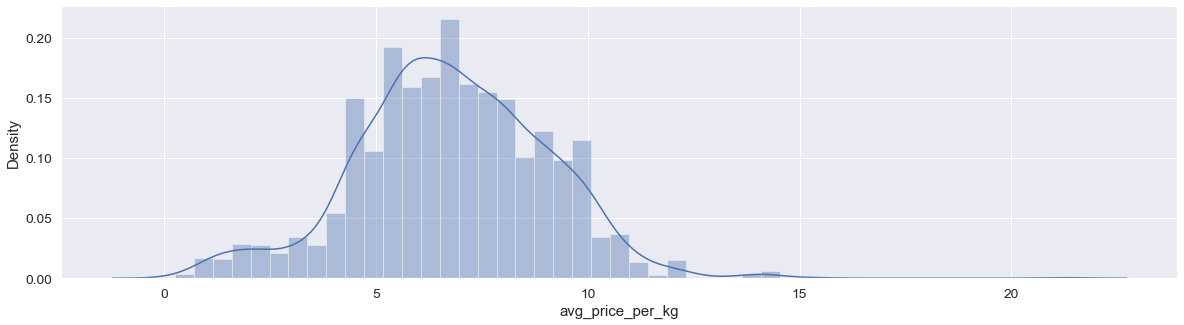

In [286]:
fig, ax = plt.subplots(figsize=(20,5))
sns.distplot(train['avg_price_per_kg'], kde=True)

## Missing values ##

In [287]:
# missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

## Correlation ##

In [288]:
train.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000


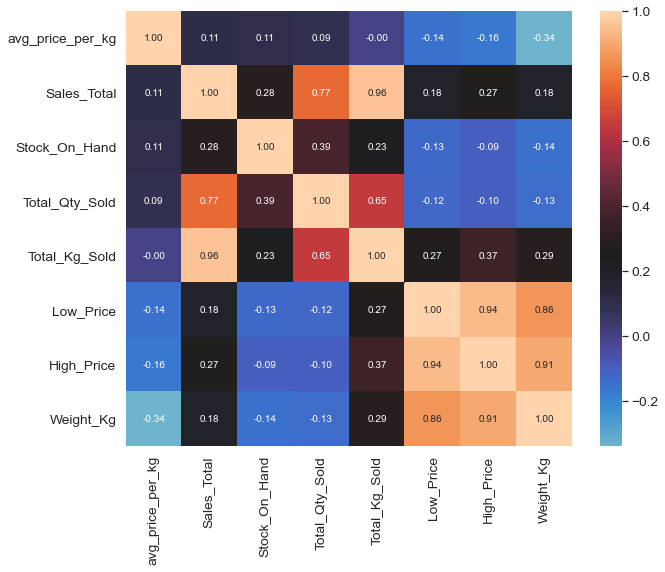

In [289]:
plt.figure(figsize=(10,8))

#avg_price_per_kg correlation matrix
cols = train.corr().nlargest(10, 'avg_price_per_kg')['avg_price_per_kg'].index
corr_mat = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)

#Plot corr matrix
sns.heatmap(corr_mat, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, center=0.25)
plt.show()

## Outliers ##

<AxesSubplot:xlabel='avg_price_per_kg'>

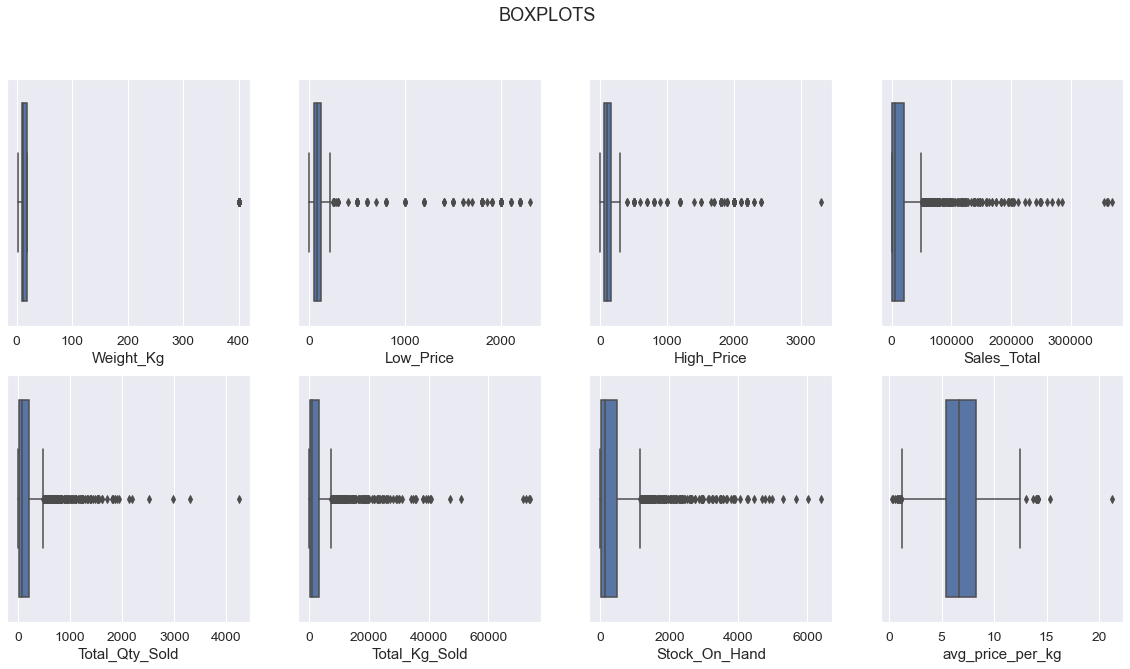

In [290]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

fig.suptitle('BOXPLOTS')

sns.boxplot(ax=axes[0, 0], data=train, x='Weight_Kg')
sns.boxplot(ax=axes[0, 1], data=train, x='Low_Price')
sns.boxplot(ax=axes[0, 2], data=train, x='High_Price')
sns.boxplot(ax=axes[0, 3], data=train, x='Sales_Total')
sns.boxplot(ax=axes[1, 0], data=train, x='Total_Qty_Sold')
sns.boxplot(ax=axes[1, 1], data=train, x='Total_Kg_Sold')
sns.boxplot(ax=axes[1, 2], data=train, x='Stock_On_Hand')
sns.boxplot(ax=axes[1, 3], data=train, x='avg_price_per_kg')

In [291]:
z_scores = stats.zscore(train[['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand', 'avg_price_per_kg']])
z_scores

array([[-0.22243292, -0.06508733, -0.10531693, ...,  0.51107251,
         0.57107005,  0.77000754],
       [-0.29570429, -0.33285514, -0.38217499, ...,  0.09183678,
        -0.56387366, -0.99142641],
       [-0.31577864, -0.31946675, -0.37063924, ..., -0.45902938,
         1.51547577, -0.29752819],
       ...,
       [-0.31577864, -0.33285514, -0.35910349, ..., -0.35420405,
         0.53102946, -0.49324307],
       [-0.29570429, -0.38640871, -0.4052465 , ..., -0.35928947,
        -0.56387366, -1.77873401],
       [-0.28566712, -0.23110338, -0.25758886, ..., -0.27103277,
        -0.47136609,  0.36968164]])

In [292]:
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
train = train[filtered_entries]

# Models #

In [293]:
# Function to fit data, make predictions, and evaluate model
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred,y_test))

def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)
    
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    
    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)
    
    df = {'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2}
    
    return df

In [294]:
model = LinearRegression(n_jobs=-1)
y = train['avg_price_per_kg']
y.shape

(1713,)

In [295]:
X = train['Total_Qty_Sold'].values.reshape(-1,1)
fit_and_evaluate(model,X,y)

{'Train RMSE': 2.088355386188714,
 'Train R^2': 0.0002875608186063694,
 'Test RMSE': 2.0690273600966442,
 'Test R^2': -0.004796236970085355}

In [296]:
X = train['Sales_Total'].values.reshape(-1,1)
fit_and_evaluate(model,X,y)

{'Train RMSE': 2.0308439939168306,
 'Train R^2': 0.05459170545108383,
 'Test RMSE': 2.023959573169621,
 'Test R^2': 0.03850019652049219}

In [297]:
X = train[['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand']].values
fit_and_evaluate(model,X,y)

{'Train RMSE': 0.7801476051460123,
 'Train R^2': 0.8604853410473233,
 'Test RMSE': 0.8035805580656303,
 'Test R^2': 0.8484330978404158}

In [298]:
X = train[['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=4)
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

## Random Forest Regression ##

In [303]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10, random_state=0)


In [304]:
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000
mean,12.807998,84.650321,103.267951,13291.842966,142.383538,1839.110333,333.629889,6.926585
std,4.066947,45.261207,52.629480,19938.188874,191.650689,2601.352286,474.022040,2.085047
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.550000
25%,9.000000,50.000000,60.000000,1140.000000,15.000000,180.000000,12.000000,5.560000
50%,12.000000,72.000000,96.000000,4840.000000,65.000000,768.600000,144.000000,6.770000
75%,18.300000,120.000000,150.000000,16590.000000,190.000000,2403.000000,443.000000,8.350000
max,18.300000,220.000000,260.000000,132150.000000,1087.000000,19178.400000,2555.000000,13.070000


In [305]:
test.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,34.142482,164.202891,195.590073,18788.111212,174.883212,2725.402336,439.245255
std,87.575995,355.167319,389.109476,33951.586813,299.351142,5059.123311,715.985761
min,3.000000,10.000000,10.000000,10.000000,1.000000,6.300000,0.000000
25%,9.000000,50.000000,64.000000,1300.000000,13.000000,204.000000,20.000000
50%,12.000000,80.000000,112.000000,5520.000000,62.000000,860.100000,153.000000
75%,18.300000,128.000000,160.000000,21176.000000,200.000000,3033.000000,516.000000
max,400.000000,2400.000000,2400.000000,308010.000000,2774.000000,47200.000000,6827.000000


In [251]:
fit_and_evaluate(model, X_train, y_train)

{'Train RMSE': 0.2931749185257226,
 'Train R^2': 0.9827791722346495,
 'Test RMSE': 0.5334603775735314,
 'Test R^2': 0.9418227686999142}

In [254]:
X = train[['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=4)
fit_and_evaluate(model,X,y)

ValueError: Found input variables with inconsistent numbers of samples: [1713, 1952]

## Ridge Regression ##

In [255]:
# Separate the features from the response
X = train[['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Sales_Total','avg_price_per_kg']].drop('avg_price_per_kg', axis=1)
y = train['avg_price_per_kg']

In [256]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

In [257]:
# Create standardization object
scaler = StandardScaler()

In [258]:
# Save standardized features into new variable
X_scaled = scaler.fit_transform(X)

In [259]:
# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Sales_Total
0,1.350794,1.444256,1.268330,1.927426,0.989675,1.629048,1.927426
1,-0.444689,-0.765787,-1.012427,0.135867,0.927042,0.646349,0.135867
2,-0.936602,-0.655285,-0.917395,-0.617179,-0.649201,-0.644895,-0.617179
3,1.350794,-0.102774,0.318014,0.939585,1.281958,2.023112,0.939585
4,-0.936602,-0.655285,-0.917395,-0.424026,-0.283847,-0.402643,-0.424026


In [260]:
# Import train/test splitting function from sklearn
from sklearn.model_selection import train_test_split

In [261]:
# Split the data into train and test, being sure to use the standardised predictors
X_train, X_test, y_train, y_test = train_test_split(X_standardise, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=False)

In [262]:
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

In [263]:
# Create ridge model
ridge = Ridge()

In [264]:
# Train the model
ridge.fit(X_train, y_train)

Ridge()

In [265]:
# Extract the model intercept value
b0 = float(ridge.intercept_)

In [266]:
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])

In [267]:
print("Intercept:", float(b0))

Intercept: 6.928373052970004


In [268]:
# Check out the coefficients
coeff

,Coefficient
Weight_Kg,-1.625519
Low_Price,1.432424
High_Price,1.730315
Sales_Total,0.364734
Total_Qty_Sold,0.334880
Total_Kg_Sold,-1.048380
Sales_Total,0.364734


In [269]:
# Fit a basic linear model
from sklearn.linear_model import LinearRegression

# Create model object
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

LinearRegression()

In [270]:
# Import metrics module
from sklearn import metrics

In [271]:
# Check training accuracy
train_model = model.predict(X_train)
train_ridge = ridge.predict(X_train)

In [272]:
fit_and_evaluate(model,X,y)

{'Train RMSE': 0.7801486443609689,
 'Train R^2': 0.8604849693591561,
 'Test RMSE': 0.8036326128117259,
 'Test R^2': 0.8484134606501597}

## Lasso Regression ##

In [166]:
# Separate the features from the response
X = train[['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Sales_Total','avg_price_per_kg']].drop('avg_price_per_kg', axis=1)
y = train['avg_price_per_kg']

In [167]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

In [168]:
# Create standardization object
scaler = StandardScaler()

In [169]:
# Save standardized features into new variable
X_scaled = scaler.fit_transform(X)

In [170]:
# Import train/test split module
from sklearn.model_selection import train_test_split

In [171]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)

In [172]:
# Import LASSO module
from sklearn.linear_model import Lasso

In [173]:
# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)

In [174]:
# Train the LASSO model
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [175]:
# Extract intercept from model
intercept = float(lasso.intercept_)

In [176]:
# Extract coefficient from model
coeff = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])

In [177]:
# Extract intercept
print("Intercept:", float(intercept))

Intercept: 6.815066227823686


In [178]:
coeff

,Coefficient
Weight_Kg,-1.931769
Low_Price,0.388647
High_Price,0.983662
Sales_Total,0.257382
Total_Qty_Sold,-0.953349
Total_Kg_Sold,-3.021495
Sales_Total,3.672356


In [179]:
# convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Sales_Total
0,-0.222433,-0.065087,-0.105317,0.811807,0.510117,0.511073,0.811807
1,-0.295704,-0.332855,-0.382175,-0.103950,0.471248,0.091837,-0.103950
2,-0.315779,-0.319467,-0.370639,-0.488870,-0.506948,-0.459029,-0.488870
3,-0.222433,-0.252525,-0.220674,0.306871,0.691504,0.679187,0.306871
4,3.608756,4.353082,3.655338,-0.468098,-0.562012,-0.419986,-0.468098


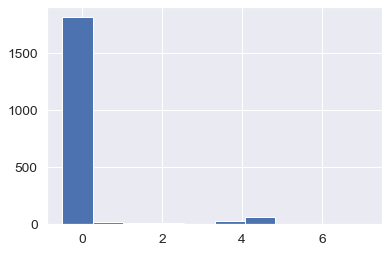

In [180]:
plt.hist(X_standardise['High_Price'])
plt.show()

In [181]:
X_standardise.describe().loc['std']

Weight_Kg         1.000256
Low_Price         1.000256
High_Price        1.000256
Sales_Total       1.000256
Total_Qty_Sold    1.000256
Total_Kg_Sold     1.000256
Sales_Total       1.000256
Name: std, dtype: float64

In [182]:
# Fit a basic linear model
from sklearn.linear_model import LinearRegression, Ridge

X_subset = train.drop(['Province', 'Container', 'Size_Grade', 'Date', 'Commodities'], axis=1)

X_subset_scaled = scaler.fit_transform(X_subset)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_subset, 
                                                        y, 
                                                        test_size=0.20, 
                                                        random_state=1,
                                                        shuffle=False)

# Least squares using non-zero variables from LASSO
model_subset = LinearRegression()

# Least squares using all predictors
model_all = LinearRegression()

# Ridge using all predictors
ridge = Ridge()


In [183]:
fit_and_evaluate(model_subset,X_train2, y_train2)

{'Train RMSE': 6.464646907830799e-14,
 'Train R^2': 1.0,
 'Test RMSE': 6.454609359088699e-14,
 'Test R^2': 1.0}

In [184]:
fit_and_evaluate(model_all,X_train, y_train)

{'Train RMSE': 1.7729855990313965,
 'Train R^2': 0.3701881712235534,
 'Test RMSE': 1.7308629410476393,
 'Test R^2': 0.38754515877113527}

In [185]:
fit_and_evaluate(ridge,X_train, y_train)

{'Train RMSE': 1.773115580987616,
 'Train R^2': 0.37009582171498245,
 'Test RMSE': 1.732187486595205,
 'Test R^2': 0.38660743607902837}

## Gradient Boosting Regression##

In [213]:
# Gradient Boosting Regressor
model = GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=2)

In [214]:
fit_and_evaluate(model,X,y)

{'Train RMSE': 0.21818640487465676,
 'Train R^2': 0.9907647980285059,
 'Test RMSE': 0.43056663541221074,
 'Test R^2': 0.960046719456471}

In [299]:
# save the model
import pickle

model_load_path= "model.pkl"
with open(model_load_path, 'wb') as file:
    pickle.dump(model, file)

with open(model_load_path,'rb') as file:
    mod = pickle.load(file)

In [300]:
preds = mod.predict(test[['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand']].values)

In [301]:
submission = pd.DataFrame(
    {'Index': index,
     'avg_price_per_kg': preds
    })

In [302]:
submission.head(10)

,Index,avg_price_per_kg
0,1,9.795205
1,2,12.961568
2,3,8.931440
3,4,9.008488
4,5,8.325930
5,6,-40.256752
6,7,4.070942
7,8,7.501765
8,9,8.432669
9,10,9.672489


In [199]:
submission.to_csv("submission.csv", index=False)